In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = pd.read_csv('earthquakes.csv')

Adding reference lines
Horizontal reference lines
axhline() adds horizontal lines. We simply specify the y value to draw the horizontal line at with the y parameter. Optionally, we can provide:

label for a string that will show up in the legend
color for the color of the reference line
linestyle for the type of line to draw
We will draw reference lines for support and resistance using the stock_analysis package that we will build in chapter 7. To get these metrics, we need to create a StockAnalyzer object:

Arbitrary straight lines
For a straight line, we just need to provide 2 endpoints which will be connected to form a line.

Text(0, 0.5, 'y')

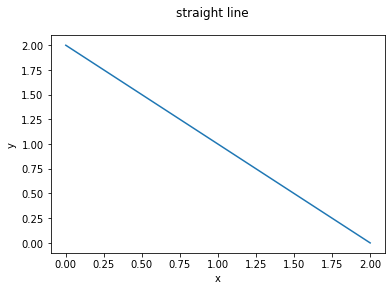

In [2]:
plt.plot([0, 2], [2, 0])
plt.suptitle('straight line')
plt.xlabel('x')
plt.ylabel('y')

We have many options for the arrow:

We have many options for the arrow:

Text(0, 0.5, 'price ($)')

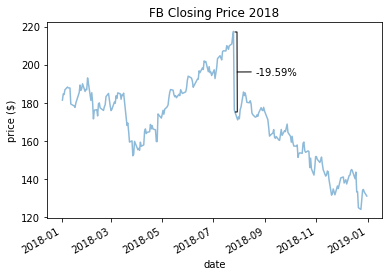

In [3]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price)/close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(
    f'{pct_drop:.2%}',
    xy=('2018-07-27', (open_price + close_price)/2),
    xytext=('2018-08-20', (open_price + close_price)/2 - 1.5),
    arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2')
)
plt.ylabel('price ($)')

We can also pass additional parameters down to the matplotlib.text.Text class, such as color, fontfamily, fontsize, and fontweight:

Text(0, 0.5, 'price ($)')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


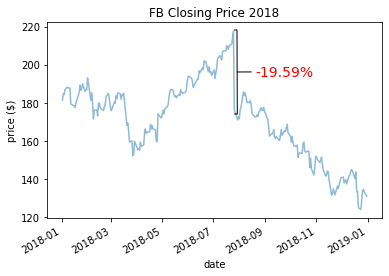

In [4]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price)/close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(
    f'{pct_drop:.2%}',
    xy=('2018-07-27', (open_price + close_price)/2),
    xytext=('2018-08-20', (open_price + close_price)/2 - 2),
    arrowprops=dict(arrowstyle='-[,widthB=3.0,lengthB=0.2'),
    color='red',
    fontfamily='Arial',
    fontsize=14,
    fontweight='medium'
)
plt.ylabel('price ($)')

Colors
We can pass colors to the color argument of the plot() method. This can be a color name, a hex code, or RGB values.

Text(0, 0.5, 'price ($)')

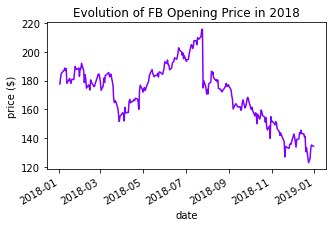

In [5]:
fb.plot(
    kind='line',
    y='open',
    figsize=(5, 3),
    color='#8000FF',
    legend=False,
    title='Evolution of FB Opening Price in 2018'
)
plt.ylabel('price ($)')

RGB values must be given as decimals:

Text(0, 0.5, 'price ($)')

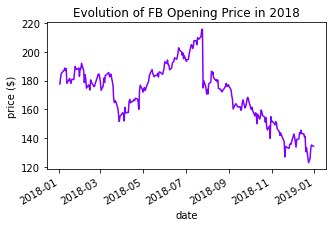

In [6]:
fb.plot(
    kind='line',
    y='open',
    figsize=(5, 3),
    color=(128/255, 0, 1),
    legend=False,
    title='Evolution of FB Opening Price in 2018'
)
plt.ylabel('price ($)')

Colormaps
Finding available colormaps

In [7]:
from matplotlib import cm
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

We can pass a colormap to the colormap argument:

Text(0, 0.5, 'price ($)')

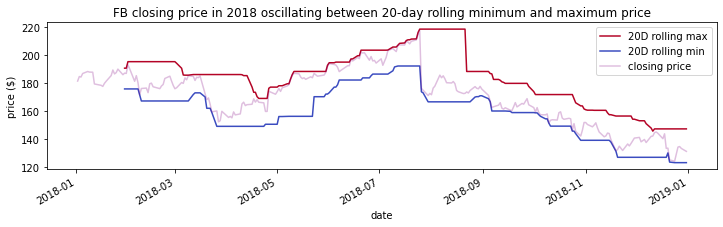

In [8]:
ax = fb.assign(
    rolling_min=lambda x: x.low.rolling(20).min(),
    rolling_max=lambda x: x.high.rolling(20).max(),
).plot(
    y=['rolling_max', 'rolling_min'], 
    colormap=cm.coolwarm_r, 
    label=['20D rolling max', '20D rolling min'],
    figsize=(12, 3),
    title='FB closing price in 2018 oscillating between '\
        '20-day rolling minimum and maximum price'
)
ax.plot(fb.close, 'purple', alpha=0.25, label='closing price')
plt.legend()
plt.ylabel('price ($)')

We can also grab colors out of a colormap, which is a callable:

In [9]:
cm.get_cmap('ocean')(.5)

/tmp/ipykernel_3295/829055828.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm.get_cmap('ocean')(.5)


(0.0, 0.2529411764705882, 0.5019607843137255, 1.0)

The color returned in the previous result is in RGBA format. We can use this to plot with the color argument:

/tmp/ipykernel_3295/1095355333.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=cm.get_cmap('ocean')(.5),


Text(0, 0.5, 'price ($)')

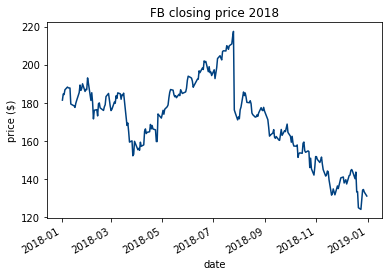

In [10]:
fb.close.plot(
    color=cm.get_cmap('ocean')(.5), 
    title='FB closing price 2018'
)
plt.ylabel('price ($)')

Notice that we get a different color if we just supply the colormap. This is because we picked the color in the middle of the colormap in the previous example:

/tmp/ipykernel_3295/358563465.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('ocean'),


Text(0, 0.5, 'price ($)')

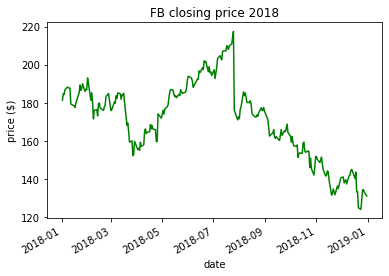

In [11]:
fb.close.plot(
    colormap=cm.get_cmap('ocean'), 
    title='FB closing price 2018'
)
plt.ylabel('price ($)')

Cycling through colors
We can use itertools to cycle through colors:

In [12]:
import itertools

colors = itertools.cycle(['#ffffff', '#f0f0f0', '#000000'])
colors

In [13]:
next(colors)

'#ffffff'

Or we can work with a ListedColormap from matplotlib:

In [14]:
from matplotlib.colors import ListedColormap
red_black = ListedColormap(['red', 'black'], N=2000)
[red_black(i) for i in range(3)]

[(1.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 1.0)]

We may also consider using a generator:

In [15]:
def color_generator():
    for year in range(1992, 200019): # integers in [1992, 200019)
        if year % 100 == 0 and year % 400 != 0:
            # special case (divisible by 100 but not 400)
            color = '#f0f0f0'
        elif year % 4 == 0:
            # leap year (divisible by 4)
            color = '#000000'
        else:
            color = '#ffffff'
        yield color
    
year_colors = color_generator()
year_colors

<generator object color_generator at 0x7f5bf6b0d930>

In [16]:
next(year_colors)

'#000000'

We can also make a generator with a generator expression:

In [17]:
year_colors = (
    '#ffffff' \
    if (not year % 100 and year % 400) or year % 4 \
    else '#000000' for year in range(1992, 200019)
)
year_colors

<generator object <genexpr> at 0x7f5bf6b0dbd0>

In [18]:
next(year_colors)

'#000000'